In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [52]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define all file names
all_files = [
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
]

In [50]:
# Combine all CSV files into a single dataframe
dataframes = []
for file in all_files:
    # Make sure to replace with the correct file path
    df = pd.read_csv(os.path.join(path, file))
    dataframes.append(df)

In [53]:
# Concatenate all dataframes
df = pd.concat(dataframes, ignore_index=True)

In [54]:
# Data cleaning: Replace infinity with NaN and drop rows with NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [55]:
# Extract features and labels
X = np.array(df.drop(columns=' Label'))
y = np.array(df[' Label'])

In [56]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [57]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [59]:
# Build the neural network model
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/20
24744/24744 - 64s - 3ms/step - accuracy: 0.9601 - loss: 0.1166 - val_accuracy: 0.9745 - val_loss: 0.0816
Epoch 2/20
24744/24744 - 62s - 3ms/step - accuracy: 0.9696 - loss: 0.0804 - val_accuracy: 0.9751 - val_loss: 0.0593
Epoch 3/20
24744/24744 - 64s - 3ms/step - accuracy: 0.9714 - loss: 0.0755 - val_accuracy: 0.9786 - val_loss: 0.0593
Epoch 4/20
24744/24744 - 82s - 3ms/step - accuracy: 0.9730 - loss: 0.0729 - val_accuracy: 0.9759 - val_loss: 0.0571
Epoch 5/20
24744/24744 - 65s - 3ms/step - accuracy: 0.9736 - loss: 0.0721 - val_accuracy: 0.9776 - val_loss: 0.0608
Epoch 6/20
24744/24744 - 81s - 3ms/step - accuracy: 0.9745 - loss: 0.0709 - val_accuracy: 0.9791 - val_loss: 0.0574
Epoch 7/20
24744/24744 - 81s - 3ms/step - accuracy: 0.9752 - loss: 0.0709 - val_accuracy: 0.9814 - val_loss: 0.0527
Epoch 8/20
24744/24744 - 82s - 3ms/step - accuracy: 0.9759 - loss: 0.0689 - val_accuracy: 0.9767 - val_loss: 0.0615
Epoch 9/20
24744/24744 - 84s - 3ms/step - accuracy: 0.9769 - loss: 0.069

In [62]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy*100:.2f}%")

26512/26512 - 33s - 1ms/step - accuracy: 0.9931 - loss: 0.0420
Test Accuracy: 99.31%


In [63]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

26512/26512 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step


In [64]:
# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    681289
                       Bot       0.99      0.33      0.50       559
                      DDoS       1.00      0.99      1.00     38540
             DoS GoldenEye       0.98      0.91      0.95      3088
                  DoS Hulk       0.97      0.99      0.98     68991
          DoS Slowhttptest       0.88      0.94      0.91      1643
             DoS slowloris       0.72      0.97      0.82      1735
               FTP-Patator       0.91      0.98      0.94      2300
                Heartbleed       0.00      0.00      0.00         1
              Infiltration       0.00      0.00      0.00         9
                  PortScan       0.99      1.00      0.99     47782
               SSH-Patator       0.94      0.98      0.96      1767
  Web Attack � Brute Force       0.00      0.00      0.00       464
Web Attack � Sql Injection       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[677987      2     52     40   1897    169    221    233      0      0
     616     72      0      0      0]
 [   371    187      0      0      0      0      1      0      0      0
       0      0      0      0      0]
 [   114      0  38302      5    106      0     12      0      0      0
       0      1      0      0      0]
 [   151      0      0   2822      0      1    114      0      0      0
       0      0      0      0      0]
 [   536      0      0      0  68432      0      0      0      0      0
      23      0      0      0      0]
 [    29      0      0      1      0   1545     66      0      0      0
       0      2      0      0      0]
 [    24      0      0      0      1     31   1676      0      0      0
       2      1      0      0      0]
 [     7      0      0      0      0      0     40   2252      0      0
       0      1      0      0      0]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0 

In [66]:
# Calculate FPR and FNR
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives
TP = np.diag(cm)                   # True Positives
TN = cm.sum() - (FP + FN + TP)     # True Negatives

# False Positive Rate and False Negative Rate
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f"False Positive Rates: {FPR}")
print(f"False Negative Rates: {FNR}")

False Positive Rates: [1.13901624e-02 2.35903581e-06 6.42115623e-05 5.56032061e-05
 2.59824577e-03 2.37386621e-04 7.81925474e-04 2.77757094e-04
 0.00000000e+00 0.00000000e+00 8.00668514e-04 1.39381712e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
False Negative Rates: [0.0048467  0.66547406 0.0061754  0.0861399  0.00810251 0.05964699
 0.03400576 0.02086957 1.         1.         0.00485538 0.02433503
 1.         1.         1.        ]


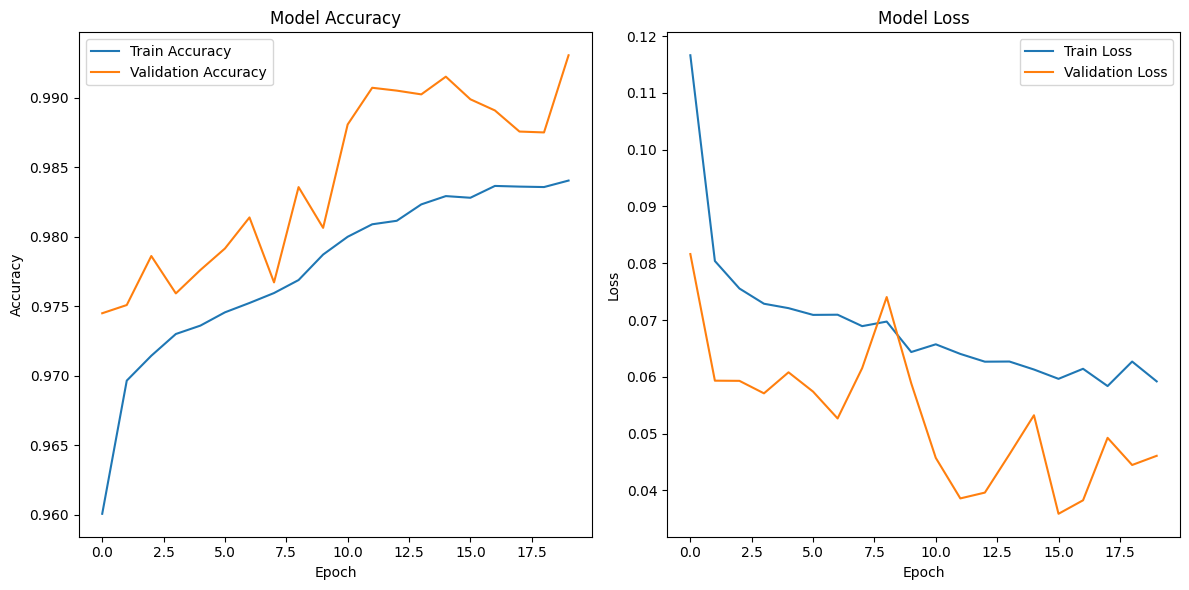

In [67]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()